# Thông tin sinh viên

MSSV: 21520711

Họ tên: Phi Quang Đạt

Bài tập số 5

Ngày thực hiện 12-4-2023

# Áp dụng phân đoạn ảnh cho các ảnh: 

1.   Chọn ngưỡng: Global




In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from numpy.linalg import norm
from scipy.spatial import distance
from scipy import ndimage, spatial
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
from skimage.feature import hog
from skimage import feature
import os
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [184]:
dir_baitap = '/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/'

In [185]:
def drawHist(x):
  hist = cv.calcHist([x], [0], None, [256], [0, 256]) 
  plt.plot(hist)
  plt.xlim([0, 256])
  plt.legend(('histogram'), loc = 'upper left') 
  plt.show()

In [186]:
def globalThresholding(img, thres=127):
  img_rst = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img_rst[i][j] < thres:
        img_rst[i][j] = 255
      else:
        img_rst[i][j] = 0
  return img_rst

In [187]:
img = cv.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/particles.bmp',0)
img1 = cv.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/Phandoan01.jpg',0)
img2 = cv.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/wdg2.jpg',0)
img3 = cv.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/rice.png',0)
dir = [img, img1, img2, img3]
titles = ['Particles','Phandoan01','wdg2','RICE']

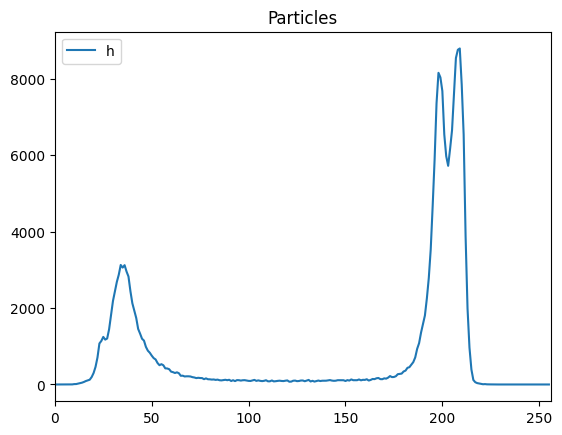

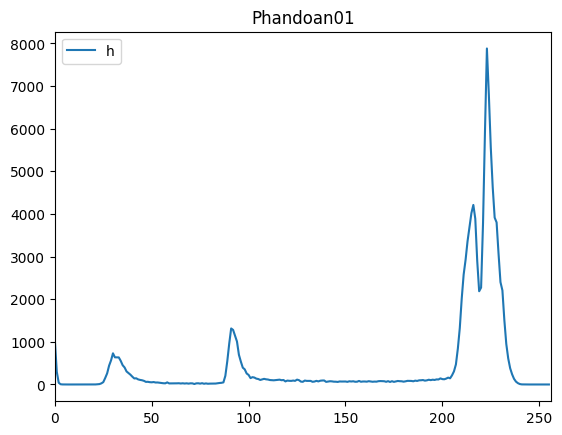

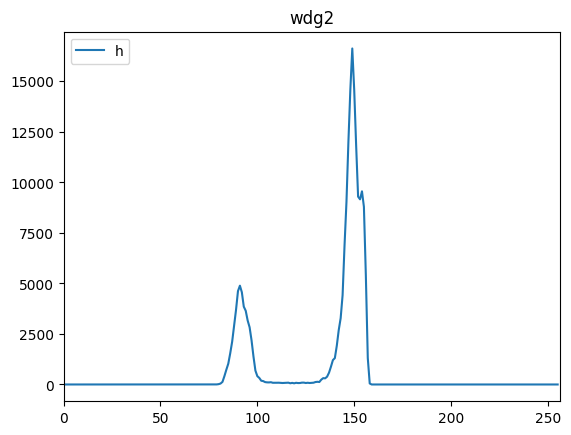

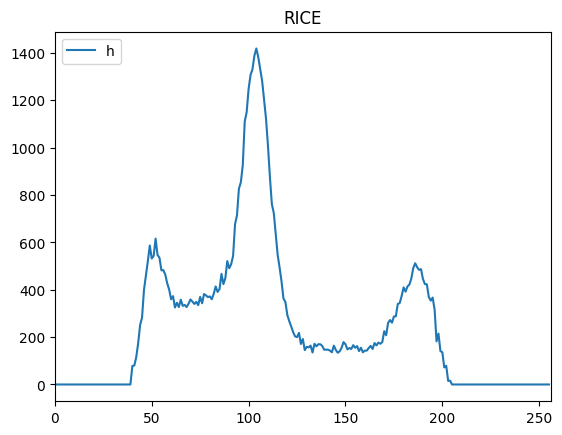

In [188]:
for i in range(4):
  plt.title(titles[i])
  drawHist(dir[i])

In [189]:
th1 = globalThresholding(img) 
th2 = globalThresholding(img1, 80) 
th3 = globalThresholding(img2, 127) 
th4 = globalThresholding(img3, 135) 
images = [th1, th2, th3, th4]

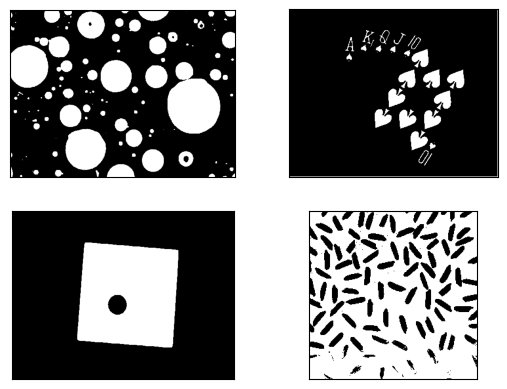

In [190]:
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

In [191]:
def adaptiveThresholding(f, nrow, ncol):
  g = f.copy()
  r = int(f.shape[0] / nrow)
  c = int(f.shape[1] / ncol)
  for i in range(int(nrow)):
    for j in range(int(ncol)):
      x = f[i * r : (i + 1) * r, j * c : (j + 1) * c]
      t = np.average(x)
      g[i * r : (i + 1) * r, j * c : (j + 1) * c] = globalThresholding(x, t)
  return g

In [192]:
def showImage(img_1, img_2, title_1, title_2):
  plt.figure(figsize=(20, 20))
  plt.subplot(1,2,1)
  plt.title(title_1)
  img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
  plt.imshow(img_1, interpolation='bicubic')
  
  plt.subplot(1,2,2)
  plt.title(title_2)
  img_2 = np.array(img_2, dtype=np.uint8)
  img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
  plt.imshow(img_2, interpolation='bicubic')

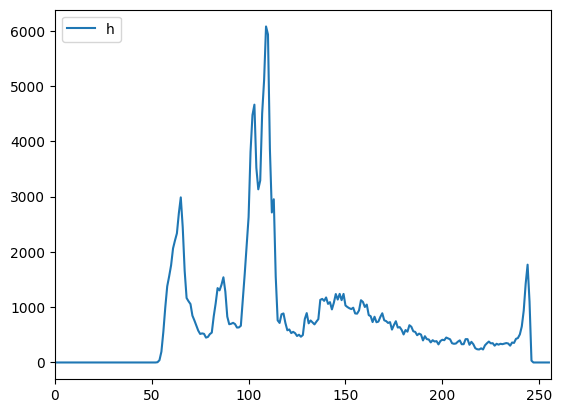

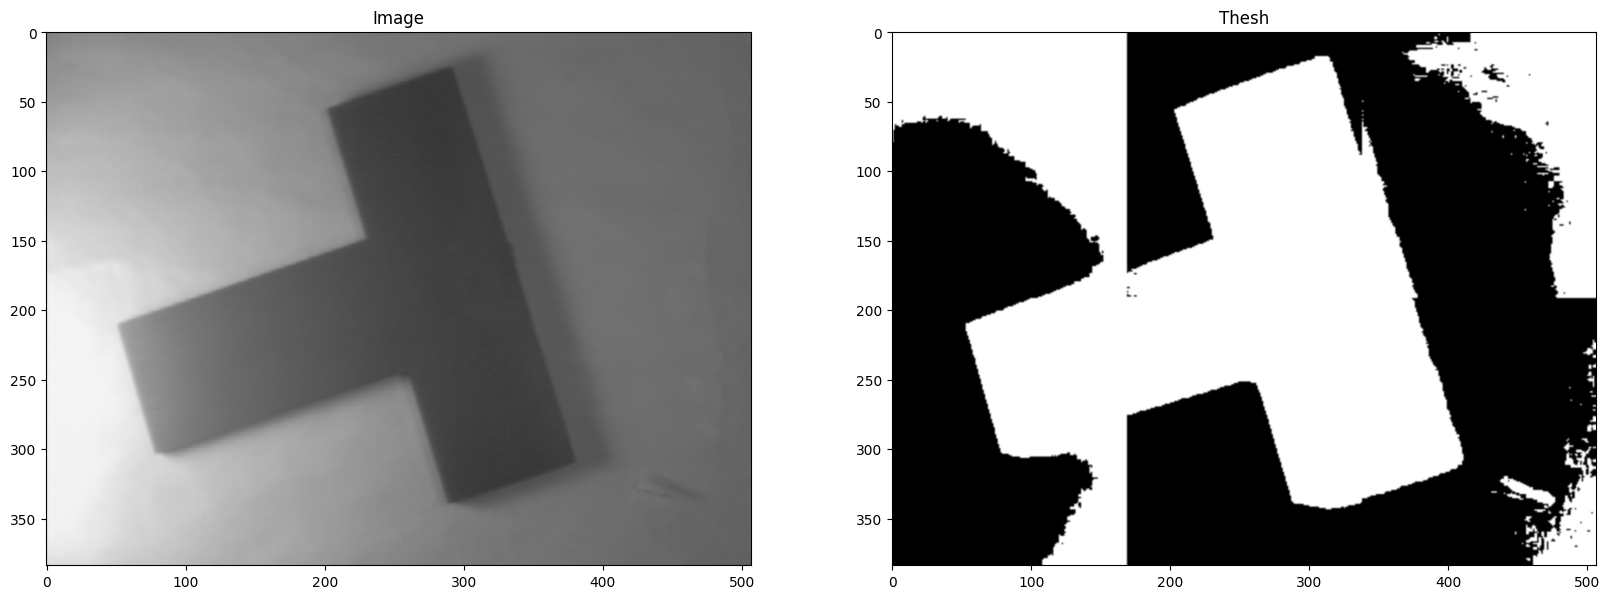

In [193]:
img_wdg3 = cv.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/wdg3.jpg',0)
img_wdg3_thresh = adaptiveThresholding(img_wdg3, 2, 3)
drawHist(img_wdg3)
showImage(img_wdg3, img_wdg3_thresh, "Image", "Thesh")

# Áp dụng thuật toán k-means

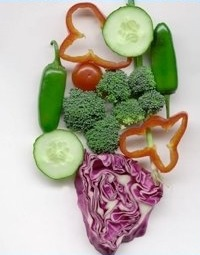

In [194]:
path_filename = os.path.join(dir_baitap, 'vegetables.jpg')
img = cv.imread(path_filename) 
cv2_imshow(img)
from sklearn.cluster import KMeans 
def Kmeans(img, n_clusters = 6):
  nrow, ncol,nchl = img.shape
  g = img.reshape(nrow*ncol,nchl)
  k_means = KMeans(n_clusters = n_clusters, random_state = 0).fit(g) 
  t = k_means.cluster_centers_[k_means.labels_]
  img_res = t.reshape(nrow, ncol, nchl)
  return img_res

In [195]:
def Kmeans2(img, n_clusters = 6): 
  img_tmp = img.copy()
  nrow, ncol,nchl = img.shape
  g = []
  for y in range(nrow):
    for x in range(ncol):
      tmp = [img_tmp[y,x][0], img_tmp[y,x][1], img_tmp[y,x][2], x, y] 
      g.append(tmp)
  k_means = KMeans(n_clusters=n_clusters, random_state=0).fit(g) 
  # t = k_means.cluster_centers_[k_means.labels_]
  arrcolor = np.random.rand(20,3) * 255 
  t = arrcolor[k_means.labels_]
  img_res = img_tmp 
  i=0
  for y in range(nrow):
    for x in range(ncol):
      img_res[y, x] = t[i][0:3]
      i += 1
  return img_res

In [196]:
dir_vegetables = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/vegetables.jpg')
dir_hand = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/hand.jpg')
dir_thuoc = cv2.imread('/content/drive/MyDrive/CS231.N22.KHCL/Baitap/Baitap5/images/thuoc.jpg')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


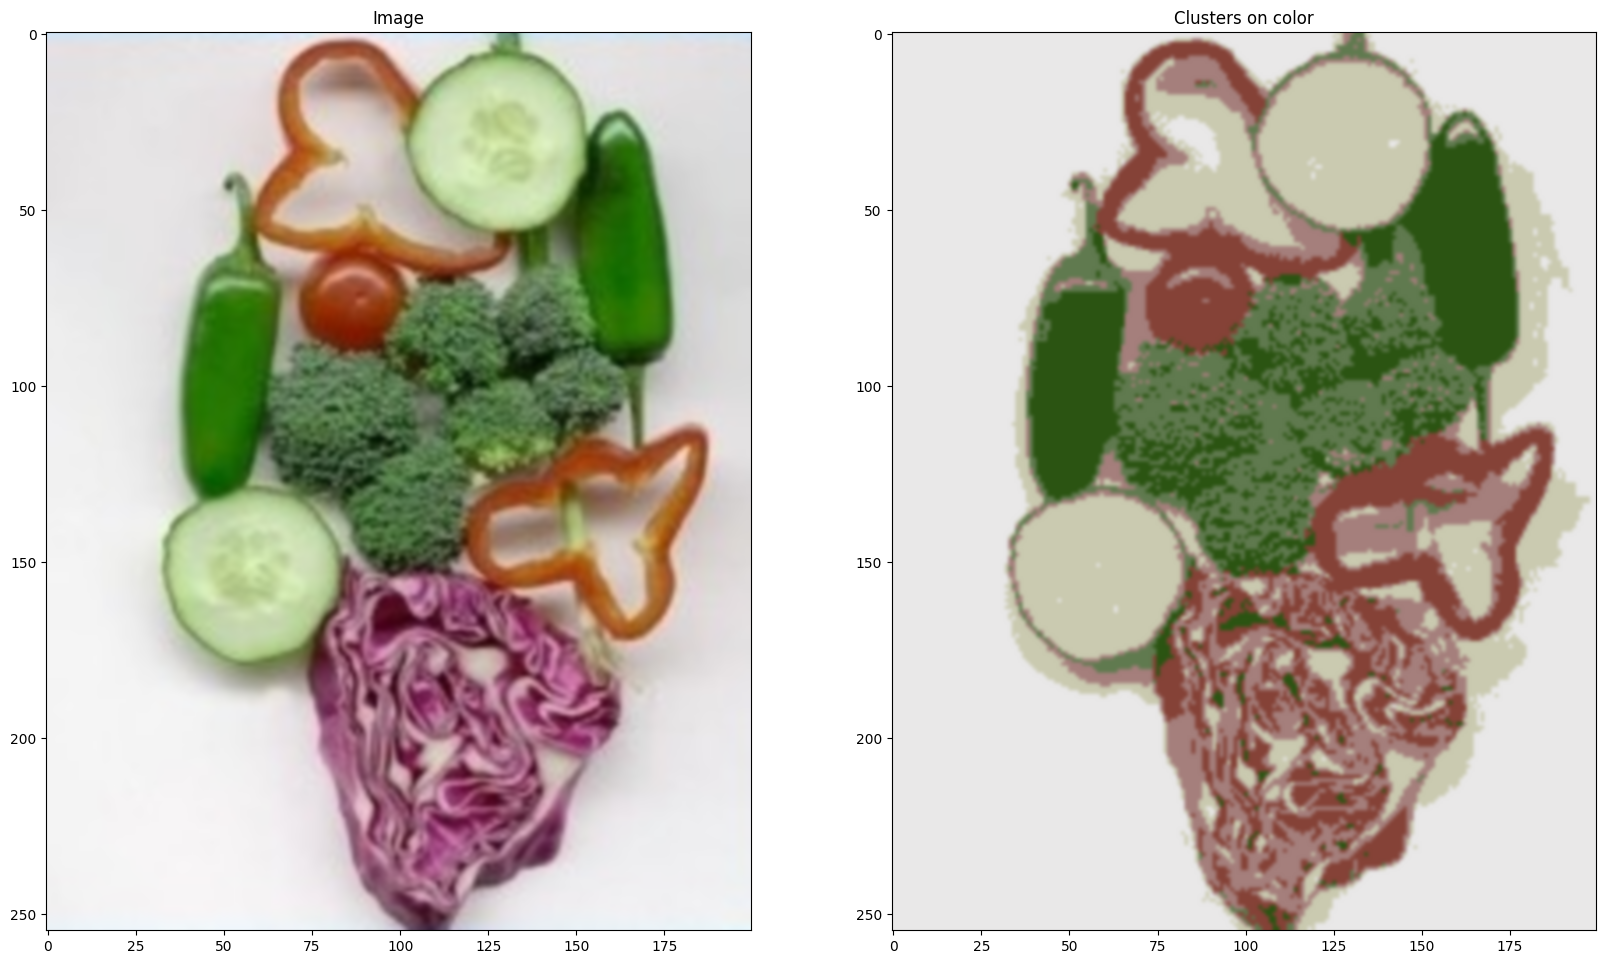

In [197]:
img_vegetables_cluster = Kmeans(dir_vegetables)
showImage(dir_vegetables, img_vegetables_cluster, "Image", "Clusters on color")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


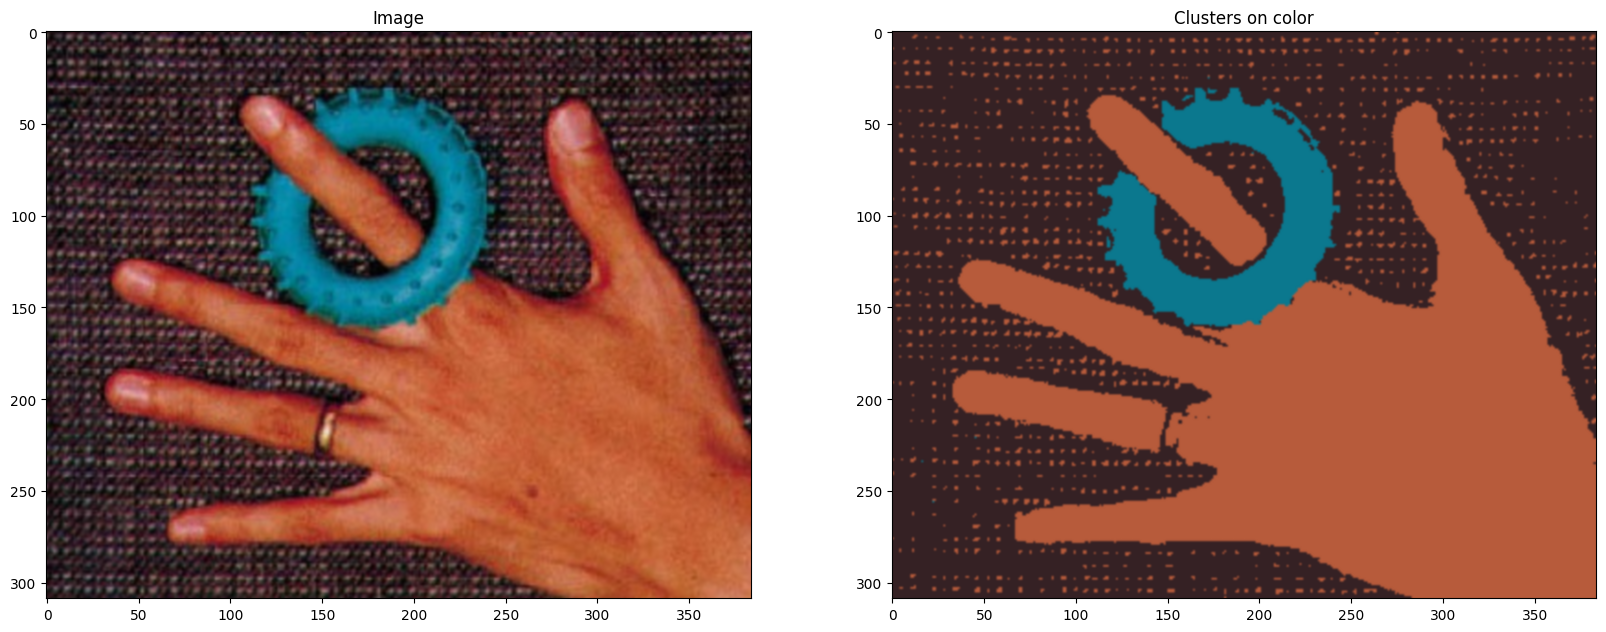

In [198]:
img_hand_cluster = Kmeans(dir_hand, 3)
showImage(dir_hand, img_hand_cluster, "Image", "Clusters on color")


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


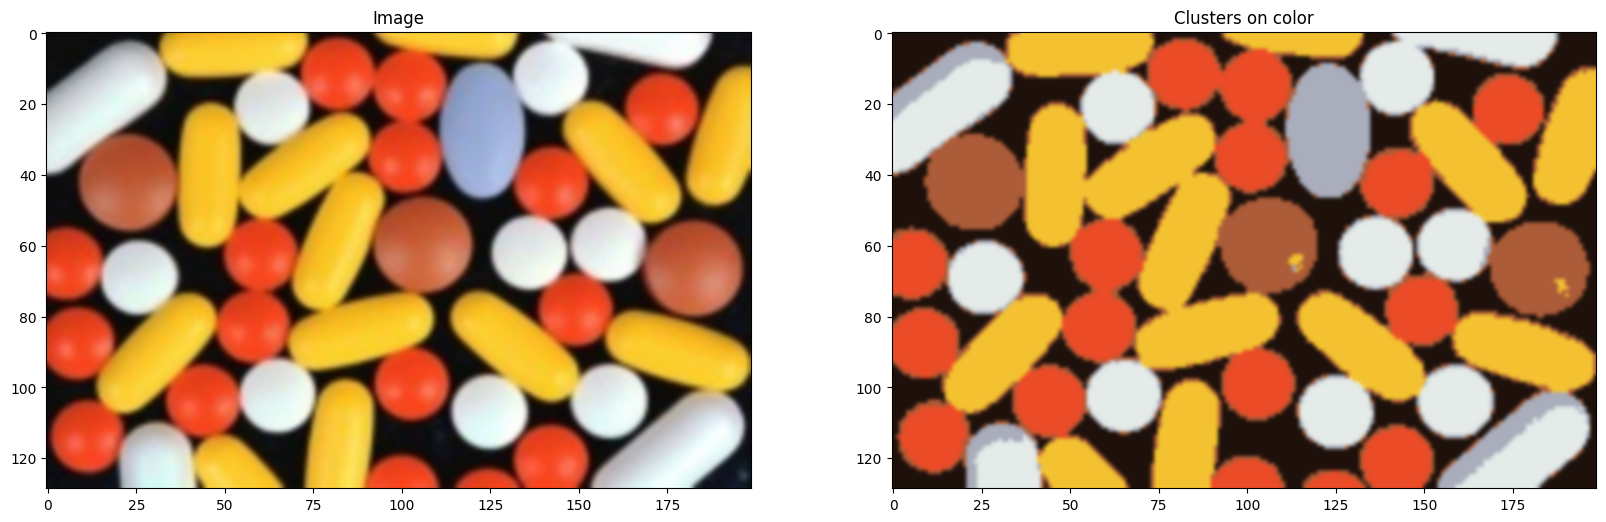

In [199]:
img_thuoc_cluster = Kmeans(dir_thuoc, 6)
showImage(dir_thuoc, img_thuoc_cluster, "Image", "Clusters on color")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


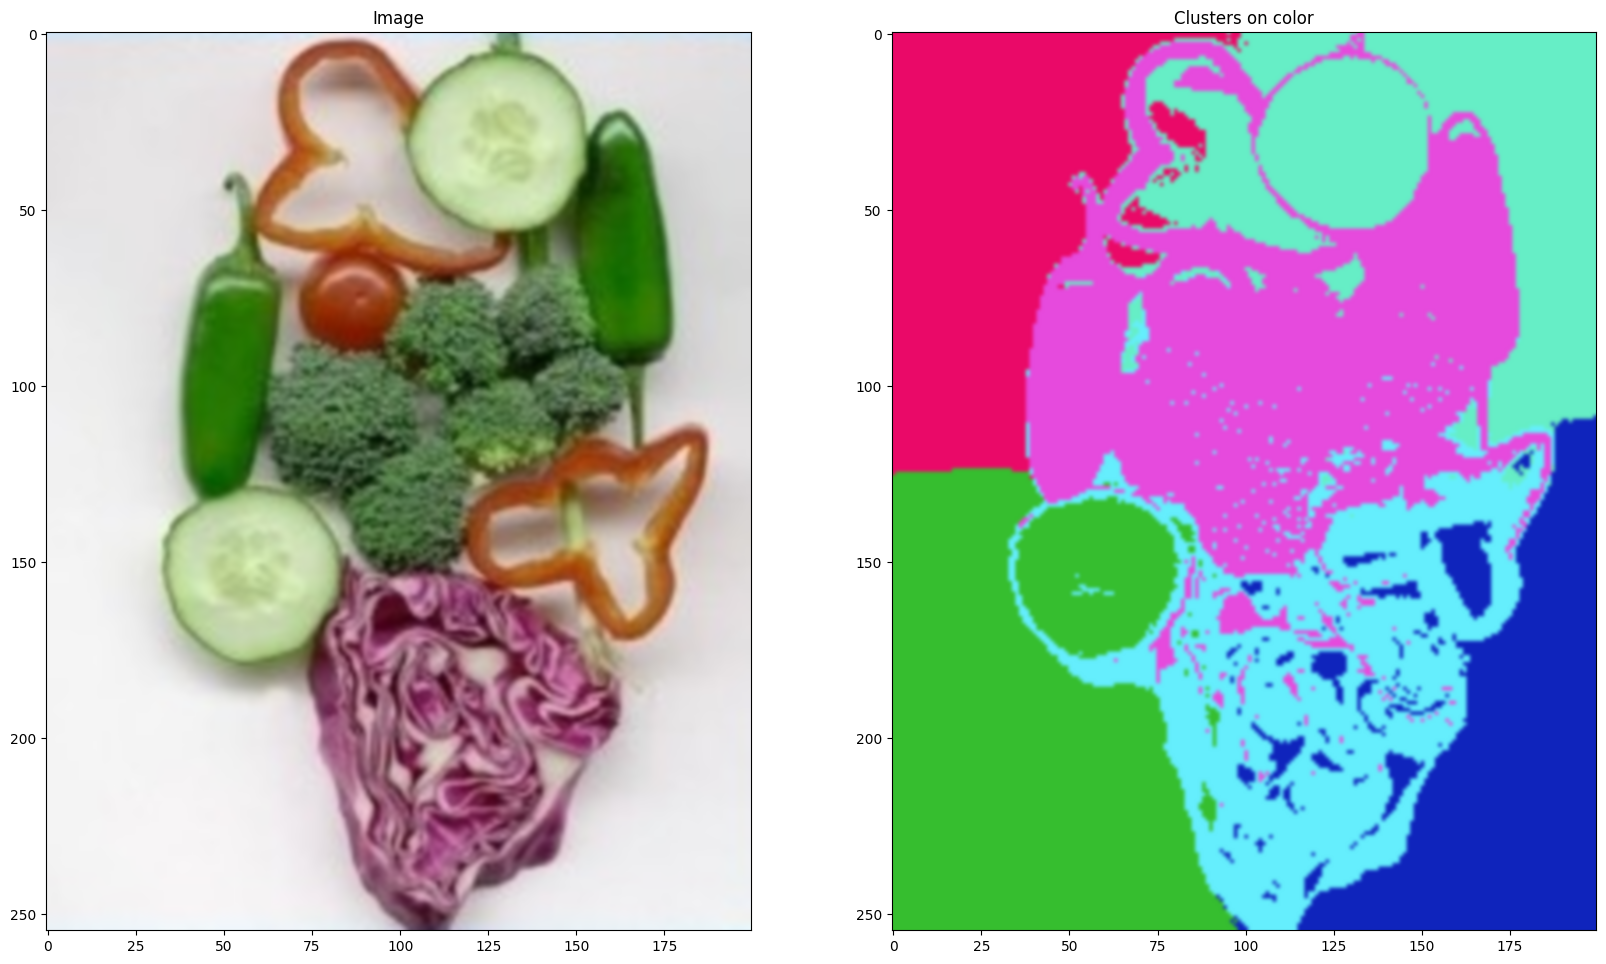

In [200]:
img_vegetables_cluster_xy = Kmeans2(dir_vegetables)
showImage(dir_vegetables, img_vegetables_cluster_xy, "Image", "Clusters on color")

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


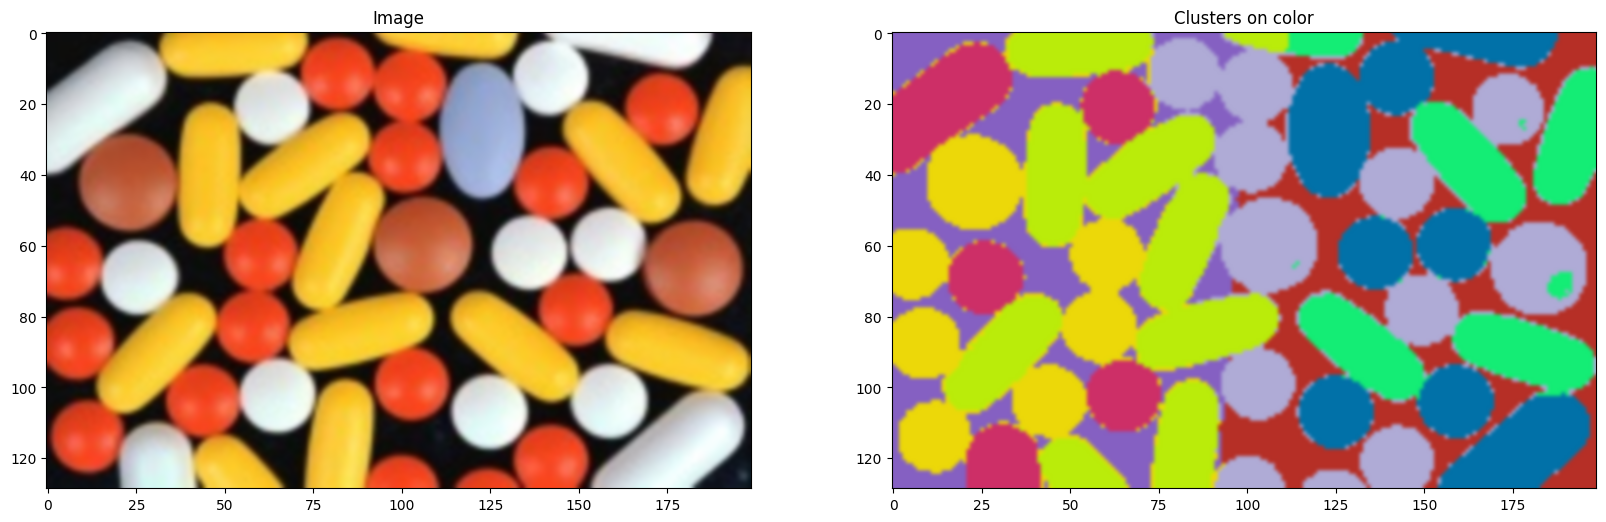

In [201]:
img_thuoc_cluster_xy = Kmeans2(dir_thuoc, 8)
showImage(dir_thuoc, img_thuoc_cluster_xy, "Image", "Clusters on color")